# Matplotlib Ders 2
Barplot & Histogram

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt


In [24]:
data = {
    "Yıl": np.arange(2010, 2021),
    "Satış": np.random.randint(100, 500, 11),
    "Masraf": np.random.randint(50, 400, 11)
}

df = pd.DataFrame(data)

regions = ["Kuzey", "Güney", "Doğu", "Batı"]

df["Bölge"] = np.random.choice(["Kuzey", "Güney", "Doğu", "Batı"], 
                               df.shape[0])

In [25]:
df.head()

,Yıl,Satış,Masraf,Bölge
0,2010,225,55,Güney
1,2011,197,289,Doğu
2,2012,109,171,Doğu
3,2013,460,213,Güney
4,2014,348,166,Güney


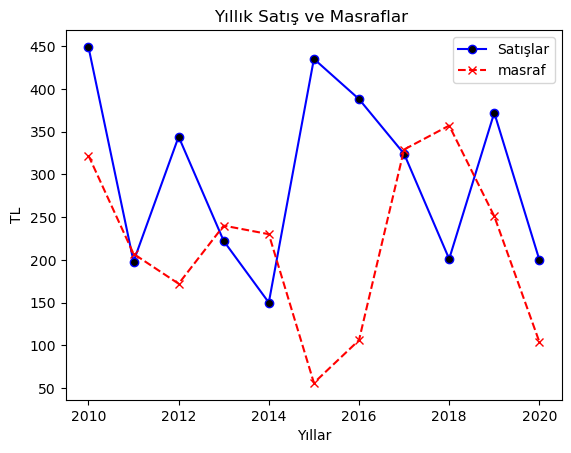

In [11]:
#SORU 
plt.plot(df["Yıl"], df["Satış"],
         label="Satışlar",
         linestyle = "-",
         marker="o", color="blue",
         markerfacecolor="black")

# Soru: Yıl ve Masrafı aynı plota ekleyin.
# Marker: "x"
plt.plot(df["Yıl"], df["Masraf"],
         label="masraf",
         linestyle = "--",
         marker="x", color="red",
         markerfacecolor="black")

# Grafiğe Başlık
plt.title("Yıllık Satış ve Masraflar ")
plt.xlabel("Yıllar")
plt.ylabel("TL")

plt.legend()
plt.show()


---

## PLT.BAR()

<BarContainer object of 5 artists>

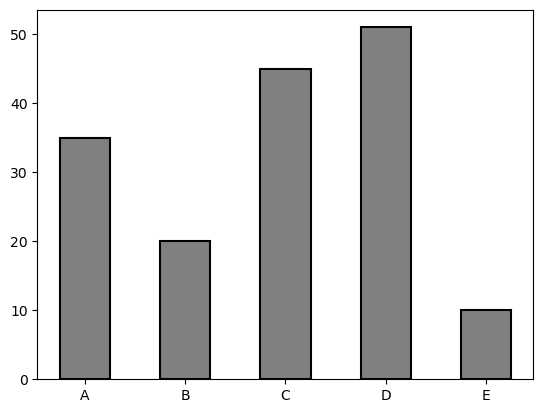

In [19]:
kat = ["A","B","C","D","E"]
val = [35, 20, 45, 51, 10]

plt.bar(kat, val, color="grey", width=0.5, edgecolor="black", linewidth= 1.5)

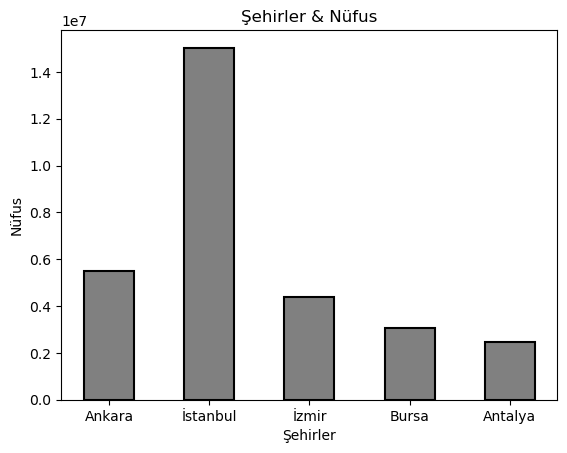

In [23]:
# SORU

data = { 'Şehir': ['Ankara', 'İstanbul', 'İzmir', 'Bursa', 'Antalya'], 
         'Nüfus': [5503985, 15029231, 4367251, 3056120, 2444535] }
df1= pd.DataFrame(data)

plt.bar(df1["Şehir"], df1["Nüfus"], color="grey", width=0.5, edgecolor="black", linewidth= 1.5)

plt.title("Şehirler & Nüfus")
plt.xlabel("Şehirler")
plt.ylabel("Nüfus")

plt.show()


In [26]:
df

,Yıl,Satış,Masraf,Bölge
0,2010,225,55,Güney
1,2011,197,289,Doğu
2,2012,109,171,Doğu
3,2013,460,213,Güney
4,2014,348,166,Güney
5,2015,290,51,Güney
6,2016,401,145,Kuzey
7,2017,301,214,Güney
8,2018,227,149,Güney
9,2019,128,291,Güney


In [28]:
sales_region = df.groupby("Bölge")["Satış"].sum()
sales_region

Bölge
Doğu      306
Güney    2223
Kuzey     401
Name: Satış, dtype: int32

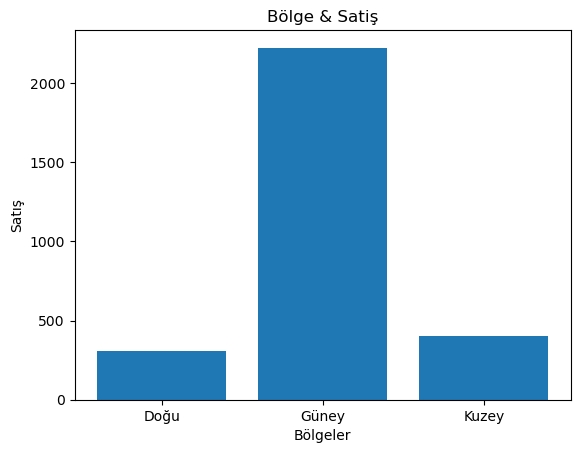

In [31]:
plt.bar(sales_region.index, sales_region.values)


plt.title("Bölge & Satiş")
plt.xlabel("Bölgeler")
plt.ylabel("Satış")

plt.show()

---

## HİSTOGRAM

Histogram Mantığı

In [32]:
sales_bins = pd.cut(df["Satış"], bins=10)
sales_bins

0       (214.3, 249.4]
1       (179.2, 214.3]
2     (108.649, 144.1]
3       (424.9, 460.0]
4       (319.6, 354.7]
5       (284.5, 319.6]
6       (389.8, 424.9]
7       (284.5, 319.6]
8       (214.3, 249.4]
9     (108.649, 144.1]
10      (214.3, 249.4]
Name: Satış, dtype: category
Categories (10, interval[float64, right]): [(108.649, 144.1] < (144.1, 179.2] < (179.2, 214.3] < (214.3, 249.4] ... (319.6, 354.7] < (354.7, 389.8] < (389.8, 424.9] < (424.9, 460.0]]

In [33]:
sales_bins.value_counts()

(214.3, 249.4]      3
(108.649, 144.1]    2
(284.5, 319.6]      2
(179.2, 214.3]      1
(319.6, 354.7]      1
(389.8, 424.9]      1
(424.9, 460.0]      1
(144.1, 179.2]      0
(249.4, 284.5]      0
(354.7, 389.8]      0
Name: Satış, dtype: int64

In [35]:
bin_counts = sales_bins.value_counts().sort_index()
bin_counts

(108.649, 144.1]    2
(144.1, 179.2]      0
(179.2, 214.3]      1
(214.3, 249.4]      3
(249.4, 284.5]      0
(284.5, 319.6]      2
(319.6, 354.7]      1
(354.7, 389.8]      0
(389.8, 424.9]      1
(424.9, 460.0]      1
Name: Satış, dtype: int64

In [37]:
bin_mid =[(interval.left + interval.right)/2 for interval in bin_counts.index]
bin_mid

[126.3745,
 161.64999999999998,
 196.75,
 231.85000000000002,
 266.95,
 302.05,
 337.15,
 372.25,
 407.35,
 442.45]

<BarContainer object of 10 artists>

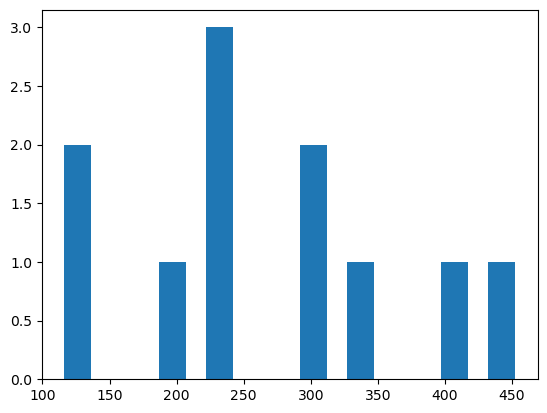

In [39]:
plt.bar(bin_mid, bin_counts.values, width=20)

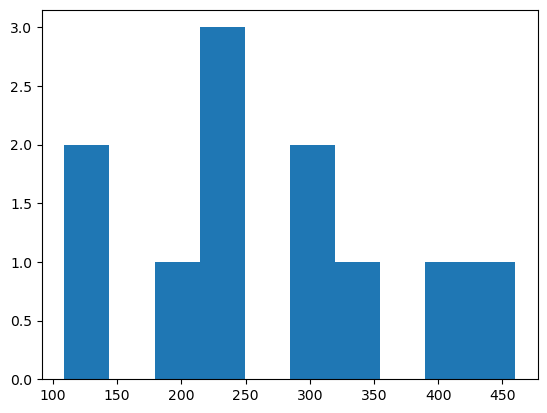

In [42]:
# Histogram
plt.hist(df["Satış"])
plt.show()

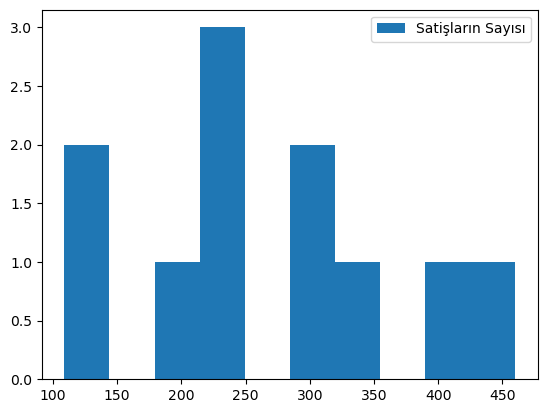

In [43]:
plt.hist(df["Satış"], bins=10, label="Satişların Sayısı")
plt.legend()
plt.show()

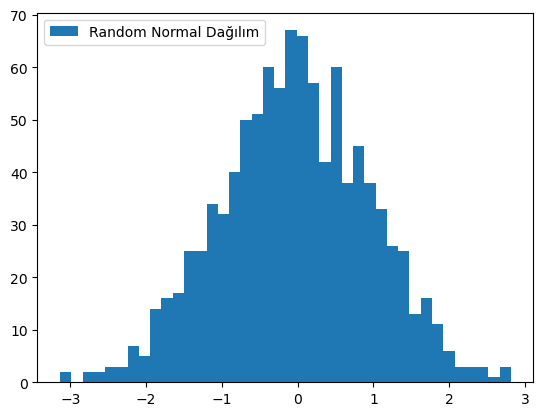

In [62]:
data = np.random.normal(size=1000)
plt.hist(data, label="Random Normal Dağılım", bins= 40)
plt.legend()
plt.show()

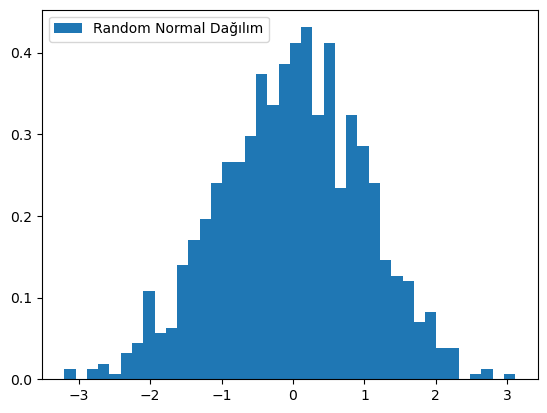

In [61]:
# SORU
# numpy ile random veri oluşturup plt.hist() ile frekansını görselleştirin.
# - np.random.randn faydalanabilirsiniz.
# - bins = 30 olsun
# - renk vb. farketmez.
data = np.random.normal(size=1000)
plt.hist(data, label="Random Normal Dağılım", bins= 40, density=True)
plt.legend()
plt.show()